### 6700 개 이미지 시간 측정 결과

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

diffs = np.load(file="./cpu_result_times_9999.npy")
g_diffs = np.load(file="./gpu_result_times_9999.npy")

### MTCNN CPU/GPU 버전 시간 측정 (500ms 이상 제외)
<ul>
    <li><b><span style="color:lightgreen">초록색 CPU</span></b></li>
    <li><b><span style="color:red">빨간색 GPU (가끔 ran out of mem 떠서 메모리를 더 요구할 때 있음)</span></b></li>
</ul>

Text(0,0.5,'Frequency')

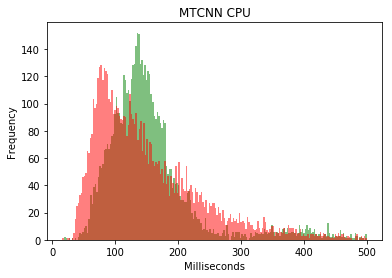

In [2]:
plt.hist(diffs, bins=200, range=(diffs.min(), 500), color="green", alpha=0.5)
plt.hist(g_diffs, bins=200, range=(g_diffs.min(), 500), color="red", alpha=0.5)
plt.title("MTCNN CPU")
plt.xlabel("Milliseconds")
plt.ylabel("Frequency")

### 통계 수치 비교 및 500ms 이상 걸리는 케이스 갯수 및 비율

In [3]:
from pandas import DataFrame, Series
data = {
    'CPU': diffs,
    'GPU': g_diffs
}
df = DataFrame(data)

num_gt_500 = sum([1 for i in diffs if i > 500])
g_num_gt_500 = sum([1 for i in g_diffs if i > 500])
df.describe().append(
    Series({
        'CPU':(num_gt_500, "%.2f%%" %(num_gt_500/len(diffs) * 100)), 
        'GPU':(g_num_gt_500, "%.2f%%" %(g_num_gt_500/len(diffs) * 100))
    }, name='500ms <')
)

,CPU,GPU
count,6732,6732
mean,258.194,164.417
std,356.513,147.318
min,18.9545,15.9786
25%,116.383,87.6502
50%,148.541,130.981
75%,200.359,200.293
max,6746.51,4462.25
500ms <,"(782, 11.62%)","(129, 1.92%)"


### 이미지 사이즈 분포 (CPU)
<ul>
    <li><b><span style="color:lightgreen">500ms 이하 초록색</span></b></li>
    <li><b><span style="color:red">500ms 이상 빨간색</span></b></li>
</ul>

In [4]:
sizes = np.load(file="sizes.npy")
THRESHOLD = 500

def size(select_lt_thres, times):
    return [int(select_lt_thres) if time < THRESHOLD else int(not select_lt_thres) for time in times]
def color(times):
    return ["lightgreen" if time < THRESHOLD else "red" for time in times]

#plt.figure(figsize=(5, 7))

Text(0.5,1,'GPU 500ms < 1.92%')

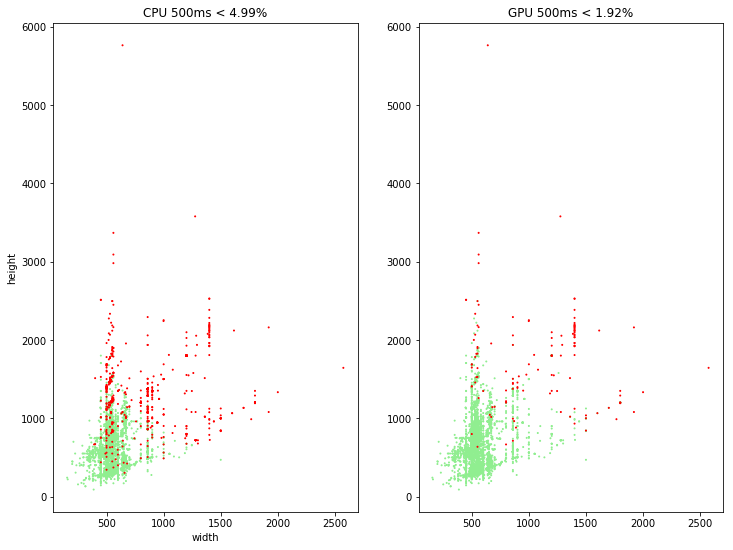

In [5]:
sizes = np.load(file="sizes.npy")
THRESHOLD = 500

f = plt.figure(figsize=(12,9))

f.add_subplot(121)
plt.scatter(sizes[:,1], sizes[:,0], s=size(True, diffs), c=color(diffs))
plt.scatter(sizes[:,1], sizes[:,0], s=size(False, diffs), c=color(diffs))
plt.xlabel("width")
plt.ylabel("height")
plt.title("CPU 500ms < 4.99%")
#plt.suptitle("MTCNN CPU vs. GPU", fontsize=16)

f.add_subplot(122)
plt.scatter(sizes[:,1], sizes[:,0], s=size(True, g_diffs), c=color(g_diffs))
plt.scatter(sizes[:,1], sizes[:,0], s=size(False, g_diffs), c=color(g_diffs))
plt.title("GPU 500ms < 1.92%")


### CPU 버전에서 최대 가로사이즈 제한해보기 (세로는 가로 감소 비율만큼 줄임)
- 최대 가로사이즈 **300, 500** 으로 제한 후 테스트
- **썸네일 프레임 최대 사이즈가 *270 x 200*** 이므로 300정도까지 잡아봄
- (이미지가 1000px 이 넘어가면 **얼굴 크기만 270 x 200이 넘어가는 경우**가 생기므로 줄이고 하는게 낫겠다는 판단)
- 속도 및 얼굴 인식 개수 비교

In [6]:
diffs_300 = np.load(file="./cpu_result_times_300.npy")
fcnts_300 = np.load(file="./cpu_result_fcnts_300.npy")
diffs_500 = np.load(file="./cpu_result_times_500.npy")
fcnts_500 = np.load(file="./cpu_result_fcnts_500.npy")
diffs_9999 = np.load(file="./cpu_result_times_9999.npy")
fcnts_9999 = np.load(file="./cpu_result_fcnts_9999.npy")
g_diffs_9999 = np.load(file="./gpu_result_times_9999.npy")
g_fcnts_9999 = np.load(file="./gpu_result_fcnts_9999.npy")
cv_diffs_9999 = np.load(file="./cv_cpu_result_times_9999.npy")
cv_fcnts_9999 = np.load(file="./cv_cpu_result_fcnts_9999.npy")

### 가로 사이즈 제한 별 MTCNN 속도 비교
<ul>
    <li><b><span style="color:green">300px 제한</span></b></li>
    <li><b><span style="color:blue">500px 제한</span></b></li>
    <li><b><span style="color:red">가로제한 없음</span></b></li>
</ul>

Text(0,0.5,'Frequency')

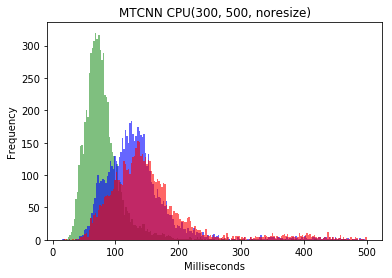

In [7]:
plt.hist(diffs_300, bins=200, range=(diffs_300.min(), 500), color="green", alpha=0.5)
plt.hist(diffs_500, bins=200, range=(diffs_500.min(), 500), color="blue", alpha=0.6)
plt.hist(diffs_9999, bins=200, range=(diffs_9999.min(), 500), color="red", alpha=0.6)
plt.title("MTCNN CPU(300, 500, noresize)")
plt.xlabel("Milliseconds")
plt.ylabel("Frequency")

### 통계 값, 500ms 초과 비율, 한 장당 평균 얼굴 인식 갯수 비교 (+ CV2)

In [8]:
from pandas import DataFrame, Series
data = {
    'CPU_300': diffs_300,
    'CPU_500': diffs_500,
    'CPU_no_resize': diffs_9999,
    'GPU_no_resize': g_diffs_9999,
    'CV_no_resize' : cv_diffs_9999
}
df = DataFrame(data)

def sumGt500ms(diffs):
    return sum([1 for i in diffs if i > 500])

def ratioGt500ms(num, diffs):
    return (num / len(diffs) * 100)

num_gt_500_w300 = sumGt500ms(diffs_300) 
num_gt_500_w500 = sumGt500ms(diffs_500) 
num_gt_500_w9999 = sumGt500ms(diffs_9999)
g_num_gt_500_w9999 = sumGt500ms(g_diffs_9999)
cv_num_gt_500_w9999 = sumGt500ms(cv_diffs_9999)

df.describe().append(
    Series({
        'CPU_300':(num_gt_500_w300, "%.2f%%" %(ratioGt500ms(num_gt_500_w300, diffs))), 
        'CPU_500':(num_gt_500_w500, "%.2f%%" %(ratioGt500ms(num_gt_500_w500, diffs))),
        'CPU_no_resize':(num_gt_500_w9999, "%.2f%%" %(ratioGt500ms(num_gt_500_w9999, diffs))),
        'GPU_no_resize':(g_num_gt_500_w9999, "%.2f%%" %(ratioGt500ms(g_num_gt_500_w9999, diffs))),
        'CV_no_resize':(cv_num_gt_500_w9999, "%.2f%%" %(ratioGt500ms(cv_num_gt_500_w9999, diffs)))
    }, name='500ms <')
).append(
    Series({
        'CPU_300':fcnts_300.mean(), 
        'CPU_500':fcnts_500.mean(), 
        'CPU_no_resize':fcnts_9999.mean(), 
        'GPU_no_resize':g_fcnts_9999.mean(), 
        'CV_no_resize':cv_fcnts_9999.mean(), 
    }, name='FD cnt mean')
)

,CPU_300,CPU_500,CPU_no_resize,GPU_no_resize,CV_no_resize
count,6732,6732,6732,6732,6732
mean,85.0255,158.84,258.194,164.417,47.0278
std,71.169,161.877,356.513,147.318,11.4056
min,16.7923,15.7182,18.9545,15.9786,27.7283
25%,61.0107,101.848,116.383,87.6502,37.7815
50%,74.3328,128.613,148.541,130.981,43.7211
75%,90.8484,156.204,200.359,200.293,55.0201
max,1983.73,3356.52,6746.51,4462.25,127.011
500ms <,"(42, 0.62%)","(196, 2.91%)","(782, 11.62%)","(129, 1.92%)","(0, 0.00%)"
FD cnt mean,2.00847,2.21123,2.25594,2.25594,0.928996


## 결과
- 인식되는 얼굴 갯수는 별로 차이 나지 않는다. 
- 이미지 사이즈에 따른 **속도는 많이 차이**난다
- **이미지 사이즈를 줄이고** cpu로 돌리는 것이 속도 편차도 적고 **훨씬 빠름** + ***인식률도 얼마 차이 안남*** (장당 0.2 명정도 손해)
- 가로를 300 이하로 더 줄이면 썸네일을 만들었을 때 이미지가 깨질 수 있어 더 이상 줄이지 않음
- ***300 resize 버전을 이용하면 openCV 의 2배 정도만 느려지면서 2배 이상의 인식률***을 보임

### 오차가 있는 경우에 대한 분석
- no_resize 버전에서 1~2 명의 인물을 인식한 것을 resize 했을 경우 인식 못하는 경우(치명적일 수 있는?)가 많은가?
- 오히려 더 많은 인물을 인식 했을 경우가 있는데 뭐지..?

In [9]:
fcnts_300

array([6, 1, 1, ..., 0, 2, 1])

In [10]:
fcnts_9999

array([8, 1, 1, ..., 0, 2, 1])

### 원본 가지고 1명을 인식했는데,
### 축소한 이미지를 넣었을 때 1명이 인식되지 않은 케이스
#### (0명 혹은 1명 이상 인식)

In [11]:
from os import listdir
from os.path import isfile, join

# idxs = [i for i, f in enumerate(fcnts_9999) if f != fcnts_300[i] and f == 1]
# 다음번엔 confidence 까지 태깅하고 1명 이상인 경우 + 에러있는 경우도 포함시켜보자

files = np.load(file="./oneperson.npy")
files[:5]

array(['/home/image/sample/설현/4ebb5427ff2d4215a4a8b3493d619d65.jpg',
       '/home/image/sample/설현/8503d8628d5d406c9b828a04228dd708.jpg',
       '/home/image/sample/설현/9a22829ac0224873a0902b75d19de471.JPG',
       '/home/image/sample/설현/a508affc72b647e4b1195ca7eb015d7d.jpg',
       '/home/image/sample/설현/bb3caf587a5548f7addb362f6dc7f34a.jpg'],
      dtype='<U59')

In [12]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
import cv2
import time

from os import listdir
from os.path import isfile, join

import numpy as np

import imghdr

import uuid

detector = MTCNN()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [18]:
def face_detection(file, THRES):
    image = cv2.imread(file) # bgr
    
    # resize
    if (image.shape[1] > THRES):
        ratio = THRES/image.shape[1]
        image = cv2.resize(image, (THRES, int(image.shape[0] * ratio)))
        
    converted_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # rgb
    faces = detector.detect_faces(converted_image) # rgb 
    
    for f in faces:
        cv2.rectangle(
            image
            , (f["box"][0], f["box"][1])
            , (f["box"][0] + f["box"][2], f["box"][1] + f["box"][3])
            , (0,0,255), 2
        )
        cv2.putText(image
            , "%dx%d" % (f['box'][2], f['box'][3])
            ,(f['box'][0] + 10, f['box'][1] + 20)
            , cv2.FONT_HERSHEY_SIMPLEX
            , 0.6, (0,255,0), 2
       )
        cv2.putText(image
                    , "(%.2f)" % (f['confidence'])
                    ,(f["box"][0] + f["box"][2], f["box"][1] + f["box"][3])
                    , cv2.FONT_HERSHEY_SIMPLEX
                    , 0.6, (0,255,0), 2
                   )
    ext = imghdr.what(file)
    filename = "%d_%d.%s" % (uuid.uuid4(), THRES, ext)
    cv2.imwrite("./tmp2/_%s" %(filename), image) # bgr -> rgb
    cv2.imwrite("./tmp2/%s" %(filename), cv2.imread(file))
    return filename

In [19]:
fd_files_300 = []
for f in files:
    fd = face_detection(f, 300)
    fd_files_300.append(fd)
    
fd_files_500 = []
for f in files:
    fd = face_detection(f, 500)
    fd_files_500.append(fd)

fd_files_9999 = []
for f in files:
    fd = face_detection(f, 9999)
    fd_files_9999.append(fd)

In [20]:
from jinja2 import Template
from IPython.core.display import HTML

t = Template("""
<table>
    {% for i in range(files | length) %}
    <tr>
        <td>
            <img  style="float:left; width:300px" src="./tmp2/_{{ files[i] }}">
        </td>
        <td>
            <img  style="float:left; width:300px" src="./tmp2/_{{ files_500[i] }}">
        </td>
        <td>
            <img  style="float:left; width:300px" src="./tmp2/_{{ files_300[i] }}">
        </td>
    </tr>
    {% endfor %}
</table>
""")
HTML(t.render(files=fd_files_9999, files_500=fd_files_500, files_300=fd_files_300))

,,
,,
,,
,,
,,
,,
,,
,,
,,
,,
,,
